In [60]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.probability import FreqDist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


#print(os.listdir("glove.840B.300d/"))

#train["target"].value_counts()

train = pd.read_csv('targetFile.csv', 'r', delimiter=',')
test = pd.read_csv('test.csv', 'r', delimiter=',')
print(train.head())
train['target'].value_counts()
train.shape, test.shape



                    qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


((134, 3), (56370, 2))

In [2]:
print('Average word length for each question in train is: {0:f}'.format(np.mean(train['question_text'].apply(lambda x: len(x.split())))))
print('Average word length for each question in test is: {0:f}'.format(np.mean(test['question_text'].apply(lambda x: len(x.split())))))

Average word length for each question in train is: 13.604478
Average word length for each question in test is: 12.752581


In [68]:
#Separating outcome from the question 

X = train.drop(['qid', 'target'], axis=1)
y = train['target']
print(X.shape, y.shape)


# What % of questions in the data are classified as insincere
num_0 = y.value_counts()[0]
num_1 = y.value_counts()[1]

print('{}% of the questions in the train set are tagged as insincere.'.format((num_1/(num_0 + num_1)*100).round(2)))

good_questions = train.loc[train['target'] == 0]


bad_questions = train.loc[train['target'] == 1]
print(bad_questions.question_text)

(134, 1) (134,)
5.22% of the questions in the train set are tagged as insincere.
22     Has the United States become the largest dicta...
30     Which babies are more sweeter to their parents...
110    If blacks support school choice and mandatory ...
114    I am gay boy and I love my cousin (boy). He is...
115                 Which races have the smallest penis?
119                    Why do females find penises ugly?
127    How do I marry an American woman for a Green C...
Name: question_text, dtype: object


{'needn', 'mustn', 'there', "she's", 'he', 'again', 'with', 'into', 'was', "should've", 'to', 'its', 'will', 'where', 'no', 'hasn', "isn't", 'all', 'wouldn', 'further', "you'd", 'for', 'until', 'hadn', 'between', 'as', "weren't", 'in', 'ourselves', 'him', "shan't", 'very', 'been', 'because', 'i', 'have', 'other', 'from', 'is', 'and', 'out', 'how', "you're", 'shouldn', 'my', 'against', 'o', 'should', 'when', 'are', 'if', 'an', 'few', 'had', 'haven', 'be', 'yourself', 'couldn', 'mightn', 'what', 'you', 'she', 'me', "don't", 'own', 'aren', 'did', 'same', "shouldn't", 'isn', 'once', 'under', "wasn't", 'off', 's', 're', 'her', 'being', 'y', 'their', 'shan', 'ours', 'at', 'd', 'most', "couldn't", 'hers', 'through', "didn't", 'then', 'over', 'which', 'during', "wouldn't", 'or', 'weren', 'don', 'too', 'it', "needn't", 'ain', 'each', 'll', 'those', 'while', 'm', 'of', 'so', 'our', 'yourselves', 'can', 'above', 've', 'any', 'your', 'were', 'only', "you've", 'whom', 'doing', 'didn', 'this', 'has'

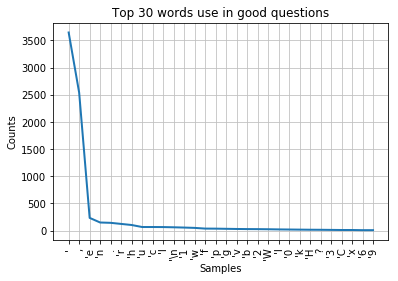

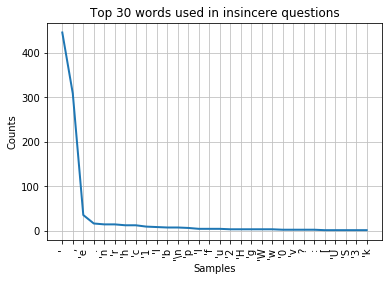

    0     1         2             3         4      5         6          7   \
0  How   did    Quebec  nationalists       see  their  province         as   
1   Do   you      have            an   adopted    dog         ,        how   
2  Why  does  velocity        affect      time      ?      Does   velocity   
3  How   did      Otto           von  Guericke   used       the  Magdeburg   
4  Can     I   convert        montra   helicon      D        to          a   

            8       9   ...     37    38    39    40    41    42    43    44  \
0            a  nation  ...   None  None  None  None  None  None  None  None   
1        would     you  ...   None  None  None  None  None  None  None  None   
2       affect   space  ...   None  None  None  None  None  None  None  None   
3  hemispheres       ?  ...   None  None  None  None  None  None  None  None   
4     mountain    bike  ...   None  None  None  None  None  None  None  None   

     45    46  
0  None  None  
1  None  None  
2 

In [63]:
# For both good and bad questions, tokenize each word, remove stop words, and graphing 

#setting up stop words to apply a filter to remove irrelevant words
stop_words = set(stopwords.words("english"))
print(stop_words)
#Graph of count top 30 words in X 



#Plotting good questions 
good_data = good_questions['question_text']

filtered_good_questions = [w for w in str(good_data) if not w in stop_words]
good_tokens = nltk.tokenize.word_tokenize(str(filtered_good_questions))
good_fd = nltk.FreqDist(good_tokens)
good_fd.plot(30,cumulative=False, title="Top 30 words use in good questions")
plt.show()

#Plotting bad questions 
bad_data = bad_questions['question_text']
filtered_bad_questions = [w for w in str(bad_data) if not w in stop_words]
bad_tokens = nltk.tokenize.word_tokenize(str(filtered_bad_questions))
bad_fd = nltk.FreqDist(bad_tokens)
bad_fd.plot(30,cumulative=False, title="Top 30 words used in insincere questions")
plt.show()



#df_good =[]
#for i in data:
#    df_good.append((nltk.word_tokenize(i)))


#dfX = pd.DataFrame(df)

#print(dfX.head(5))


#Transcribe dfX to list the tokens for a question in a row format  

dfX_T = dfX.T
print("Max number of words per question in X: {}".format(len(dfX_T.index)))
print(dfX_T.head(30))


#for i in len(dfX_T.columns):
#    dfX_T.columns
#print(len(dfX_T.columns))



In [76]:


df_good =[]
for i in good_data:
    df_good.append((nltk.word_tokenize(i)))
    
df1 = pd.DataFrame(df_good)

df_good_T = df1.T
print("Max number of words per good question: {}".format(len(df_good_T.index)))


df_bad =[]
for i in bad_data:
    df_bad.append((nltk.word_tokenize(i)))
    
df1 = pd.DataFrame(df_bad)

df_bad_T = df1.T
print("Max number of words per bad question: {}".format(len(df_bad_T.index)))

Max number of words per good question: 47
Max number of words per bad question: 42


KeyError: 'question_text'

In [26]:
#Tokenize per sentence and feed to FreqDist to count # of words in X

fdist = FreqDist()
for sentence in nltk.tokenize.sent_tokenize(X['question_text']):
    for word in nltk.tokenize.word_tokenize(sentence):
        fdist[word] += 1

TypeError: expected string or bytes-like object

In [ ]:
# For y, tokenize each word per question and transpose for graphing purposes.  


In [5]:
#Code below is just some random testing I was attempting regarding the dataframe and for loop

df = pd.DataFrame()

In [6]:
print(df[1])

KeyError: 1

In [ ]:
df[0] = pd.DataFrame(nltk.word_tokenize(X.question_text[0]))

In [ ]:
df[0]

In [ ]:
df = pd.DataFrame(nltk.word_tokenize(X.question_text[2]))
print(df)

In [ ]:
print(df)

In [ ]:
for index in X.iterrows():
    print(index[0])
    print(X.question_text[index[0]])

In [ ]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer